# Lab 2 

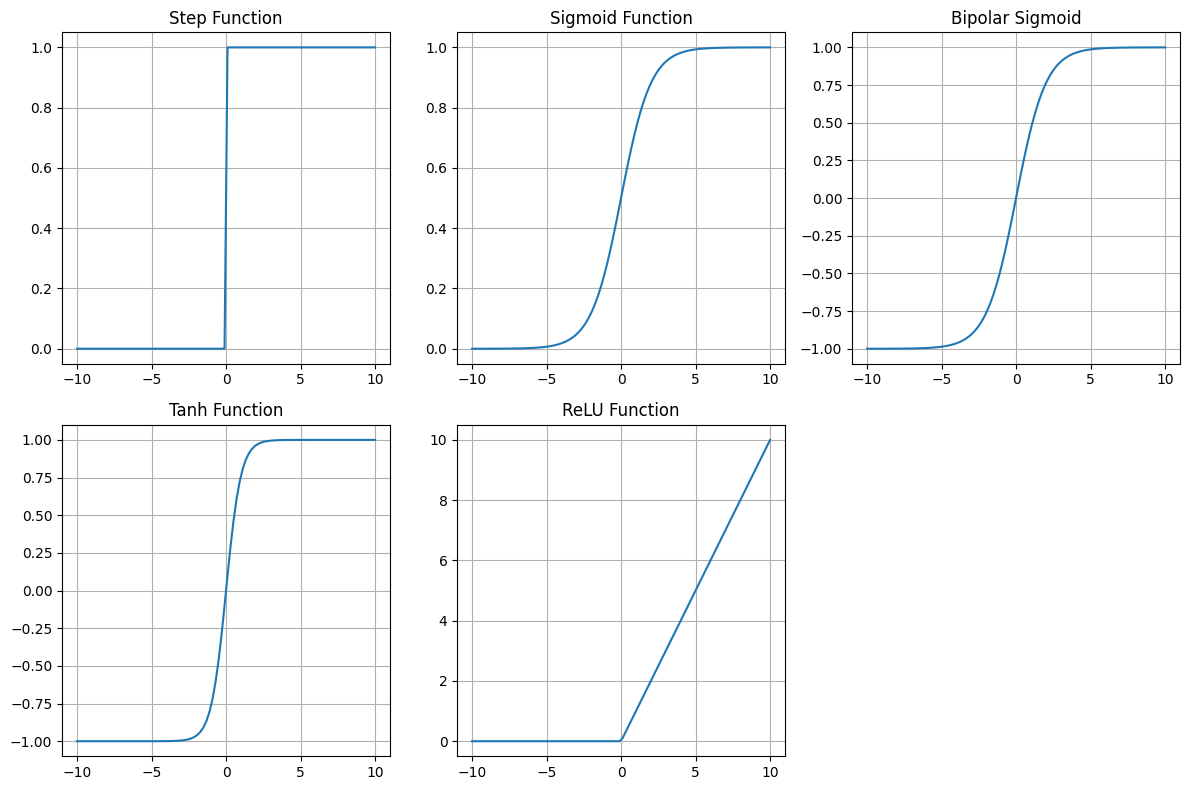

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define input values (range from -10 to 10)
x = np.linspace(-10, 10, 100)

# Step Function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Sigmoid Function (Binary)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Bipolar Sigmoid Function
def bipolar_sigmoid(x):
    return (2 / (1 + np.exp(-x))) - 1

# Tanh Function
def tanh(x):
    return np.tanh(x)

# ReLU Function
def relu(x):
    return np.maximum(0, x)

# Plotting
functions = [step_function, sigmoid, bipolar_sigmoid, tanh, relu]
titles = ['Step Function', 'Sigmoid Function', 'Bipolar Sigmoid', 'Tanh Function', 'ReLU Function']

plt.figure(figsize=(12, 8))
for i, func in enumerate(functions):
    plt.subplot(2, 3, i+1)
    plt.plot(x, func(x))
    plt.title(titles[i])
    plt.grid(True)
plt.tight_layout()
plt.show()



Training with Sigmoid activation:
Test accuracy: 0.8450

Training with Tanh activation:
Test accuracy: 0.8250

Training with ReLU activation:
Test accuracy: 0.8400


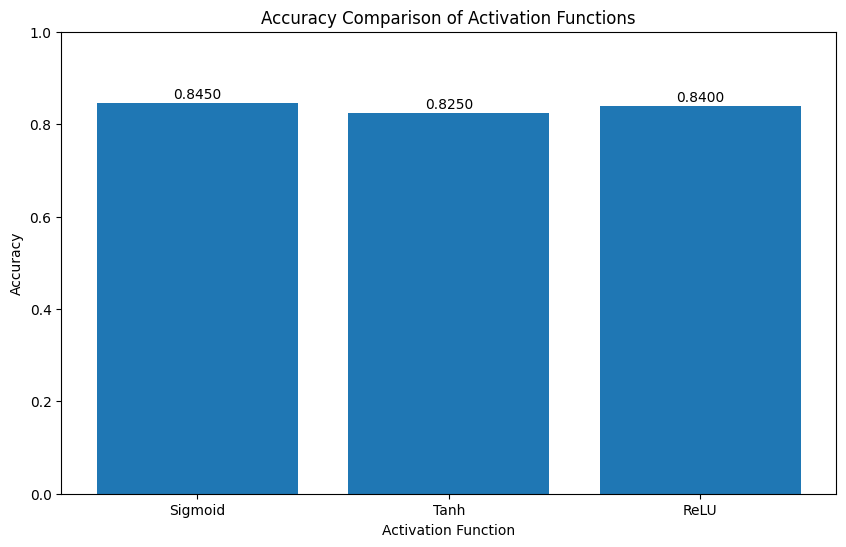

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Neural network functions (same as before)
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

def forward_propagation(X, W1, b1, W2, b2, activation_func):
    Z1 = np.dot(X, W1) + b1
    A1 = activation_func(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def backward_propagation(X, y, Z1, A1, A2, W2, activation_derivative):
    m = X.shape[0]
    dZ2 = A2 - y
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, W2.T) * activation_derivative(A1)
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
    return dW1, db1, dW2, db2

def train_network(X, y, hidden_size, activation_func, activation_derivative, epochs, learning_rate):
    input_size = X.shape[1]
    output_size = 1
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

    for _ in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2, activation_func)
        dW1, db1, dW2, db2 = backward_propagation(X, y, Z1, A1, A2, W2, activation_derivative)

        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

    return W1, b1, W2, b2

def predict(X, W1, b1, W2, b2, activation_func):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2, activation_func)
    return (A2 > 0.5).astype(int)

# Generate a simple dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters
hidden_size = 5
epochs = 1000
learning_rate = 0.1

# Train and evaluate networks with different activation functions
accuracies = []
activation_functions = [
    ('Sigmoid', sigmoid, sigmoid_derivative),
    ('Tanh', tanh, tanh_derivative),
    ('ReLU', relu, relu_derivative)
]

for activation_name, activation_func, activation_derivative in activation_functions:
    print(f"\nTraining with {activation_name} activation:")
    W1, b1, W2, b2 = train_network(X_train, y_train.reshape(-1, 1), hidden_size,
                                   activation_func, activation_derivative,
                                   epochs, learning_rate)

    y_pred = predict(X_test, W1, b1, W2, b2, activation_func)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Test accuracy: {accuracy:.4f}")

# Visualize the accuracies in the form of a bar plot
plt.figure(figsize=(10, 6))
plt.bar([func[0] for func in activation_functions], accuracies)
plt.title("Accuracy Comparison of Activation Functions")
plt.xlabel("Activation Function")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')  # Add text labels on top of each bar
plt.show()

# Interpretation

## Sigmoid Performance:
The sigmoid activation function slightly outperformed the others. This could be because:

The decision boundary in this particular dataset might be more suited to the S-shaped curve of the sigmoid function.
Sigmoid is often effective for binary classification tasks, which is what we have here.


## ReLU Performance:
ReLU performed nearly as well as sigmoid. This is noteworthy because:

ReLU is known for its ability to handle the vanishing gradient problem better than sigmoid in deeper networks.
Its linear nature for positive inputs might have captured important features in the data effectively.


## Tanh Performance:
While tanh had the lowest accuracy, it's important to note that it's not significantly lower than the others. Tanh is often seen as a scaled version of sigmoid, and in this case, it didn't provide any particular advantage.